In [18]:
import os
import sys
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/'.join(os.getcwd().split('/')[:-2]))
from src import *

In [2]:
cursor = connect_cora()

Initial analysis of properties of the CORA citation network

In [3]:
command_str = f"""
        SELECT * FROM cites
    """.strip()

cursor.execute(command_str)

In [4]:
edges = cursor.fetchall()

## Generate Graph and find Connected Components

In [5]:
G=nx.from_edgelist(edges)

In [6]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
len(S)

78

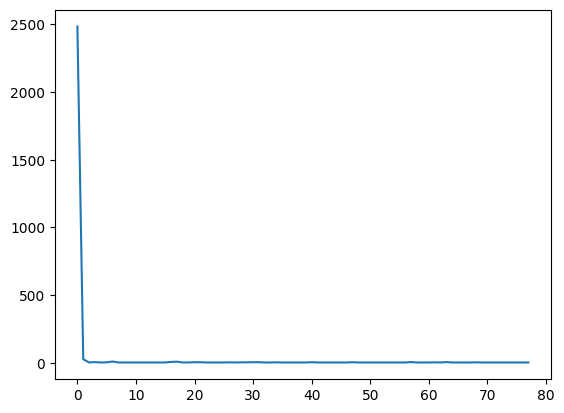

In [20]:
sizes = []
for subgraph in S:
    sizes.append(subgraph.number_of_nodes())

plt.plot(np.arange(len(S)),sizes)
plt.show()

In [30]:
np.where(np.array(sizes)>26)[0].size

1

## Compute Stats for Largest Connected Component

In [29]:
S[0].number_of_nodes()

2485

In [8]:
S[0].number_of_edges()

5069

In [9]:
# Average Degree
2*S[0].number_of_edges() / float(S[0].number_of_nodes())

4.0796780684104625

In [10]:
nx.average_shortest_path_length(S[0])

6.310998681298742

In [11]:
nx.average_clustering(S[0])

0.2376355109554117

In [16]:
# Max Degree
np.max(np.sum(nx.adjacency_matrix(G),axis=1))

168

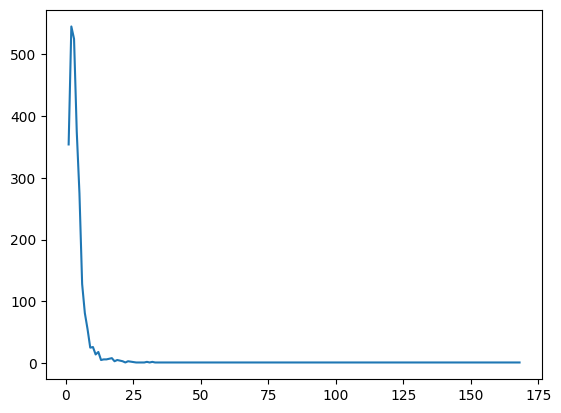

In [15]:
fig = plot_deg_dist(S[0])

In [ ]:
close()

- Graph is sparse
- Deg Dist. is either Exp or Power Law
- All components other than largest are less than 26 nodes